In [3]:
#Check the enviroment that Jupyter is using:
#import sys
#sys.executable

#NOTE on scikit-learn: Is used for typical Machine Learning Algorihms and not Deep-learning.

import numpy
#Machine learning library:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
#Image processing library:
from skimage import io, color
'''
Note on Tensorflow: Uses Nvidia drivers and CUDA for parallel execution: https://developer.nvidia.com/cuda-toolkit
Else Tensorflow will fall back using the CPU.
Also: We can use cuDNN for GPU acceleration: 
https://developer.nvidia.com/cudnn
'''
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
#Plotting library:
import matplotlib.pyplot as plt
#CSV handler: https://docs.python.org/3/library/csv.html 
import csv
#Web handler: https://pypi.org/project/requests/
import requests 
#Pillow library for images: https://pypi.org/project/Pillow/
from PIL import Image
from io import BytesIO

In [4]:
dataset = [] 

#Open CSV file for reading and filter for evaluated artefacts: 
with open('DIME billeder.csv', mode='r', newline='') as csv_file:
    csv_reader = csv.DictReader(csv_file, delimiter=';')

    #Extract URL and Process fields:
    for row in csv_reader:
        process = row['process']
        thesaurus = row['thesaurus']
        #Filter for evaluated artefacts:
        if 'dime.find.process.evaluated' in process:
            #Only url of coins:
            if 'coin' in thesaurus:
                url = row['URL']
                data_point = {'url':url}
                dataset.append(data_point)


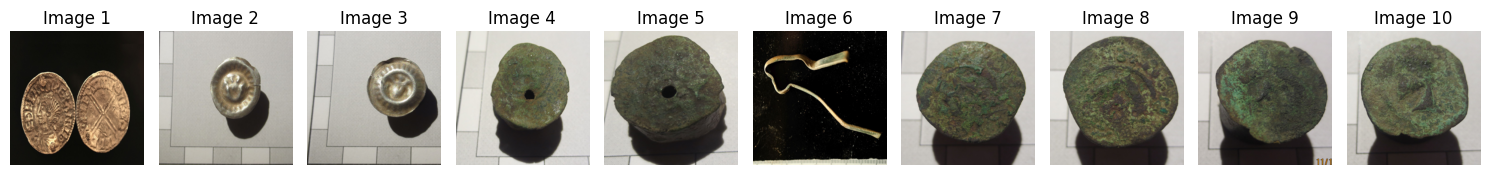

In [8]:
'''
Display the top 10 first images in our dataset. 
Test purpose:
'''
# Download and display the top 10 images
num_images_to_display = 10
#Create subplot
fig, axes = plt.subplots(1, num_images_to_display, figsize=(15, 5))  # Adjust the figure size as needed

for i, data_point in enumerate(dataset[:num_images_to_display]):
    url = data_point['url']
    response = requests.get(url)
    
    if response.status_code == 200:
        img = Image.open(BytesIO(response.content))
        img = img.resize((224, 224))  # Resize the image as needed
        
        # Display the image in the corresponding subplot
        axes[i].imshow(img)
        axes[i].axis('off')  # Hide the axis for each subplot
        axes[i].set_title(f'Image {i + 1}')  # Set a title for each subplot. 
                #using f-string that evaluates expression inside and print.

    if i == num_images_to_display - 1:
        break

plt.tight_layout()
plt.show()